### Group 7 

Mariam Hergnian  
Daniel Jordan  
Walter Martemucci   
Jake Jackson  

# Simulation of a Positron Induced Muon Source

This project aims to investigate a possible muon source for a high brilliance muon beam. The source aims to take advantage of a particular particle interaction. 

Electon positron anihaliation into muon-antimuon pairs. 


![feynman](img/Feynman.png)


The source to be simulated involves a positron beam incident on a 3cm thick Berillium target. The starting point of this jupyter notebook is the differential cross section of this particle interaction [1]. This is used to find the angular distribution of emerging muon pairs. This distribution can be sampled to form a monte carlo dataset of muon ejection angles, also called scattering angles. These can be used in combination with the center of mass energy of the interaction to find the momentums of the emerging muons. The center of mass enery $\sqrt{s}$ is taken to be slightly larger than the threshold energy $2m_u$ for the initial calculations. The beam is initally considered to have a uniform spread of energies. Then a more realistic gaussian spread of energies is used. The ideal beam energy is defined as one that will traverse the entire 3cm target but no further. This is found and used in the investigation. In the following sections we look into each of these topics in more detail and present our findings.


## Differential Cross Section

![mariam](img/mariam.jpeg)

The differential cross section expresses the probability that an event happens at each possible scattering angle $\theta$.
The differential cross section for the scattering of the $e^+ + e^- \to \mu^+ + \mu^-$, with $\sqrt{s} \sim 2 m_\mu$  in the center-of-mass energy frame is [1], 

\begin{equation}
\frac{d\sigma}{d \Omega} =\frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left(1+\frac{4}{s}\left(m_{e}^{2}+m_{\mu}^{2}\right)+\left(1-\frac{4 m_{e}^{2}}{s}\right)\left(1-\frac{4 m_{\mu}^{2}}{s}\right) \cos ^{2} \theta\right).
\end{equation}


Where $\alpha$ is the the fine_structure constant. The total cross section can be calculated as a function of the interactions center of mass energy squared, $s$, by integrating over the entire solid angle range.

$$\sigma (s) = \int^{4\pi~sr}_{0}\frac{d\sigma}{d \Omega} d\Omega$$  



$$\sigma (s) = \int_0^{2\pi} \int_0^{\pi} sin\theta~\frac{d\sigma}{d\Omega}~d\theta~d\phi  =  \frac{4\pi\alpha^2}{3s^3}\frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}(2m_e^2+s)(2m_\mu^2+s) $$ 

In [ ]:
%matplotlib inline
import numpy as np
import math 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy.random as npr
import pandas as pd


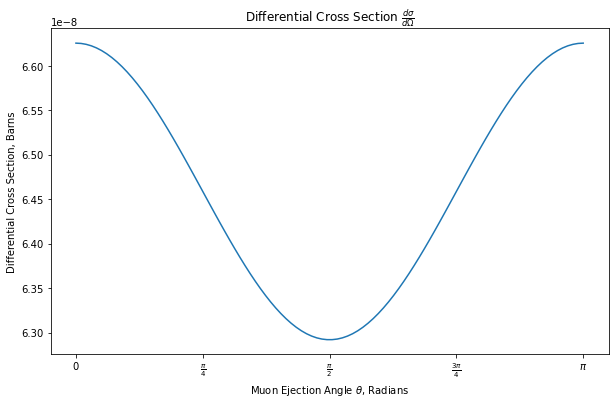

In [ ]:
#######Physical Constants################
#mariam
m_muon = 105.6583755 #Muon mass [MeV/c^2]
m_e = 0.510998 #Electron mass [MeV/c^2]
#jake
me = 0.510998
mu = 105.6583755
#daniel
mu2 = m_muon**2 #muon's mass squared. In handy in calculations
me2 = m_e**2 #electron's mass squared 

#CoM energy constants
root_s =  2*mu
s_min = 4*mu**2 
S = 4*mu2 + 5000 #MeV^2 #
#
alpha = 0.007297352 # Fine Structure Constant no unit of measurement
#----------------------------------------

#conversion factor for differential cross section, natual units to barns
con1 = 2.56819e-3 #MeV−2/con1 = barns


def d_sigma(s,theta):#differential cross section
    d_sigma = (alpha**2/(4*s))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**-0.5*(1+(4/s)*(m_e**2+m_muon**2)+(1-(4*m_e**2)/s)*(1-(4*m_muon**2)/s)*np.cos(theta)**2)
    return d_sigma

def sigma(s):#total cross section
    sigma = 4*np.pi*(alpha**2/(3*s**3))*(1-(4*m_muon**2)/s)**0.5*((1-(4*m_e**2)/s))**(-0.5)*(2*m_e**2+s)*(2*m_muon**2+s)
    return sigma

##Plotting the differential cross section in CoM
theta = np.linspace(0,np.pi,100)
DCS = [d_sigma(S,th)/con1 for th in theta] #barns

figDCS, ax = plt.subplots(figsize = (10,6))
ax.plot(theta,DCS)
ax.set_title(r'Differential Cross Section $\frac{d\sigma}{d \Omega}$')
ax.set_xlabel(r'Muon Ejection Angle $\theta$, Radians')
ax.set_ylabel('Differential Cross Section, Barns')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
plt.show()

## Angular Probability Density Function 

A probability density function follows the trend implied by the physical laws and has an integral over the entire range equal to one. Therfore if we normalise the differential cross section we have a probability density function. More importanly one that describes the angular distribution of the muon pairs.

$$\int^{4\pi~sr}_{0}\frac{d\sigma}{d \Omega} d\Omega = \sigma$$

$$\int^{4\pi~sr}_{0}\frac{1}{\sigma}\frac{d\sigma}{d \Omega} d\Omega = 1 $$

The probability density function of ejected muons having a solid angle $\Omega$ is then,

$$\mathbb{P}(\Omega) = \frac{1}{\sigma}\frac{d\sigma}{d \Omega}$$

To find the probability density function in terms of theta we can integrate over $\phi$,

$$\mathbb{P}(\Omega) = \int^{2\pi}_{0} \frac{1}{\sigma}\frac{d\sigma}{d \Omega} \sin\theta~d\phi$$

$$\mathbb{P}(\theta) = \frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}.$$
 
The aim is to sample random numbers (ejection angles, $\theta$) from this probability density function.


In [ ]:
#probability density function, PDF of ejection angles
def prob_d(theta,s):#theta - ejection angle #s - CoM energy squared
    sig = sigma(s)
    D_S = d_sigma(s,theta)
    return (2*np.pi*np.sin(theta)/sig)*D_S



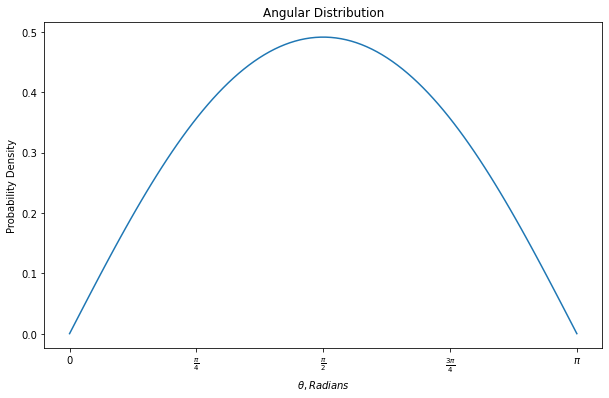

In [ ]:
figProbDist = plt.figure(figsize = (10,6))
plt.plot(theta, prob_d(theta,S))
plt.title("Angular Distribution")
plt.xlabel(r'$\theta, Radians$' )
plt.ylabel(r'Probability Density' )
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
plt.show()



<h1>Monte Carlo Simulation</h1>

The goal of this section is to sample muon ejection angles from a probability density function that matches the physics of the interaction. The PDF required is the normalised probability density function which we did in the previous section. The inverse transmorm method is then used to sample angles from this PDF.

**Inverse Transform Sampling**

The sampling method used is known as Inverse Transmorm Sampling. The goal of this method is to take a random number generated from the uniform probability density function $U$ and pass it into a function, $F(U)$, that returns a sample of our generated dataset $X$. In this case our generated dataset is made of ejection angles. 

$$F(U) = X$$


This function we seek can be shown to be the inverse of the cumulitive density function, CDF, of our probability density function. The CDF is the probability of sampling an event with a value less than $x$.

To prove $CDF^{-1}(U)$ is indeed the function $F(U)$ we use probability notation. 

The CDF is defined as,

$$CDF(x) = \mathbb{P}(X\leq~x).$$ 

If we sub in $F(U) = X$ from before then we get,

$$CDF(x) = \mathbb{P}(F(U)\leq~x).$$ 

If we apply the inverse function $F^{-1}(U)$ to both sides of the inequality then we arrive at,

$$CDF(x) = \mathbb{P}(U \leq~F^{-1}(x)).$$ 

This expresses the probability that a value sampled from the uniform distrubution is less than $F^-1(x).$ The uniform distribution is such that the probability of sampling less than a vaue is equal to that value. As can be seen in the uniform distribution below. The probability of sampling an $U < 0.8$ is the area of the blue section before the red line. This is 0.8 of the total area. Therfore $\mathbb{P}(U < 0.8) = 0.8$ and more generally $\mathbb{P}(U < u) = u$.

![image.png](attachment:image.png)

This argument show's that, 

$$CDF(x) = \mathbb{P}(U\leq~F^{-1}(x)) = F^{-1}(x).$$ 

$$CDF(x) = F^{-1}(x).$$

These functions are the inverse of eachother. This means that, $F(x) = CDF{^-1}(x)$. This is true for any value of x. We can sub in the sample from our uniform distribution U and we get. 

$$F(U) = CDF^{-1}(U)$$

$F(U)$ was origionaly defined as a function that will produce our desired dataset X when U is a uniformly distributed random number from 0 to 1. It has now been shown that the inverse of the CDF meets these requirements. Therefore the inverse CDF can be used to sample angles from the normalised differential cross section.

**Finding the CDF**

The PDF for the muon ejection angle that matches the physics of the interaction is, 

$$\mathbb{P}(\theta) = \frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}$$

The CDF is defined as the integral, 

$$CDF(\theta) = \int^{\theta}_{0}\frac{2\pi\sin\theta}{\sigma}\frac{d\sigma}{d \Omega}~d\theta.$$

Constants $a$ and $b$ are introduced to simplify the integration. The differential cross section is repeated below,

\begin{equation}
\frac{d\sigma}{d \Omega} =\frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left(1+\frac{4}{s}\left(m_{e}^{2}+m_{\mu}^{2}\right)+\left(1-\frac{4 m_{e}^{2}}{s}\right)\left(1-\frac{4 m_{\mu}^{2}}{s}\right) \cos ^{2} \theta\right) 
.\end{equation}

This can be re-expressed as,

$$\frac{d\sigma}{d \Omega} = a + b~cos^2(\theta)$$

where,

$$a = \frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[1+\frac{4}{s}(m_e^2+m_\mu^2)\right]$$

$$b = \frac{\alpha^{2}}{4s} \frac{\sqrt{1-\frac{4 m_{\mu}^{2}}{s}}}{\sqrt{1-\frac{4 m_{e}^{2}}{s}}}\left[\left(1-\frac{4m_\mu^2}{s}\right)\left(1-\frac{4m_e^2}{s}\right)\right]$$

Thus the integration becomes,

$$ \int^{\theta}_{0}\frac{2\pi\sin\theta}{\sigma}[a + b~cos^2(\theta)]~d\theta = \frac{2\pi}{\sigma}\left[-\frac{\cos\theta}{3}(3a+b~\cos^2\theta)\right].$$ 


[]

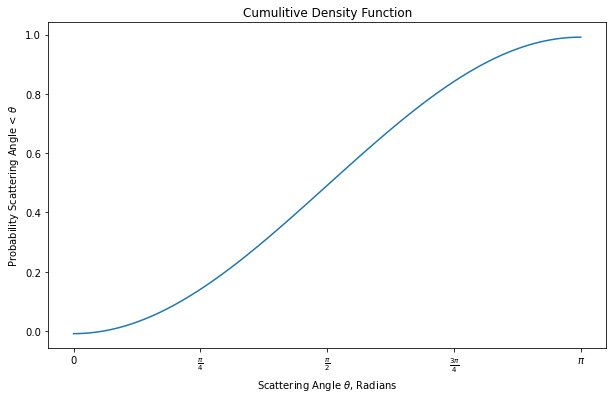

In [ ]:
#a and b constants used to simplify integration
def ab(s):
    #more constants to simplify calculation
    ce = 1-(4*me2/s)
    cu = 1-(4*mu2/s)
    c1 = alpha**2/(4*s)#e**4/(64 * np.pi**2 * s)
    c2 = c1 * cu**(1/2) * ce**(-1/2)

    a = c2 * (1+(4/s)*(me2+mu2))
    b = c2 * (1-(4*mu2/s)) * (1-(4*me2/s))
    return a, b

#Cumulitive Density Function. Probability a THETA sampled is less than theta in the function.
def cdf(theta,s):
    a,b = ab(s)
    sig = sigma(s) # mariams
    return (2*np.pi/sig)*((-np.cos(theta)*(3*a+b*np.cos(theta)**2)*1/3)+ a)

theta = np.linspace(0,np.pi,100) #max theta range
CDF = [cdf(th,S) for th in theta] #Cumulative Density Function

figCDF, ax = plt.subplots(figsize = (10,6))
plt.plot(theta,CDF)
plt.title('Cumulitive Density Function')
plt.xlabel(r'Scattering Angle $\theta$, Radians')
plt.ylabel(r'Probability Scattering Angle < $\theta$')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
plt.plot()

**Finding The Inverse CDF**

The inverse of this function cannot be found analyticaly. Instead a look up tabel is generated. For many $\theta$ values the value of CDF is calculated and the two values are associated with eachother. The inverse function of finding the CDF from a particular $\theta$ can then be found by looking for the value in the tabel. There is an issue if we want to know the CDF for a theta value we have not calculated. In this case we use linear iterpolation. This simply means we assume the path between two calculated vaues is linear so we can guess any value inbetween. 

SciPy has a function for interpolation called interpl1d and this will be used to create our approximate inverse function.

[]

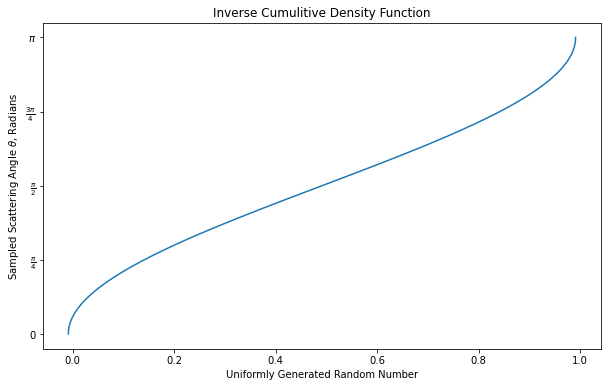

In [ ]:
#Theta Generation, Sampling from the PDF, Using Inverse CDF Method
def thetaGen2(howMany,s):#howMany - the number of thetas to generate #s - CoM energy squared
    #generate the lookup table for the inverse function
    theta = np.linspace(0,np.pi,100)
    CDF = [cdf(x,s) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
    thetaPredictor = interp1d(CDF, theta, kind = "linear")
    return [float(thetaPredictor(x)) for x in npr.uniform(min(CDF),max(CDF),howMany)]

figCDFinv, ax = plt.subplots(figsize = (10,6))
ax.plot(CDF,theta)
ax.set_title('Inverse Cumulitive Density Function')
ax.set_xlabel(r'Uniformly Generated Random Number')
ax.set_ylabel(r'Sampled Scattering Angle $\theta$, Radians')
ylabels = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
ylocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.yticks(ticks = ylocations, labels = ylabels)
plt.plot()

**Plotting The Distribution**

This function can now be used to generate a large number of muon scattering angles that follow the distribution.


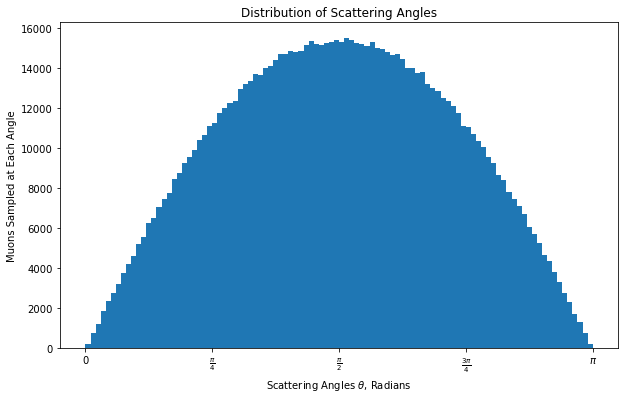

In [ ]:
#
generatedThetas = thetaGen2(int(10e5),S)

figThetaGen2 , ax = plt.subplots(figsize = (10,6))
hist = plt.hist(generatedThetas, bins = 100)
y = hist[0]
binEdge = hist[1]
bincenters = 0.5 * (binEdge[1:]+binEdge[:-1])
binwidth = binEdge[1]-binEdge[0]
plt.title('Distribution of Scattering Angles')
plt.ylabel('Muons Sampled at Each Angle')
plt.xlabel(r'Scattering Angles $\theta$, Radians')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
plt.show()

## Considerations For a Realistic Beam Shape

The positron beam is assumed to have a gaussian energy distribution. The center of the beam is given an energy of $E_{LAB} = 743714~MeV$. This value is the minimum beam energy required to penetrate the entire 3cm thick Berillium Block as will be shown in a later part. The full width half maximum of the beam is assumed to be $0.5GeV$ or $500MeV$.

A random positron energy is sampled from this gaussian and used to find the center of mass energy via the following formulation [2].

$$s = 2m_e^2+2m_e~E_{LAB}$$

This center of mass energy can then be used to generate an inverse CDF via the previous explained methods. Which in turn is used to sample a scattering angle of the correct distribution.

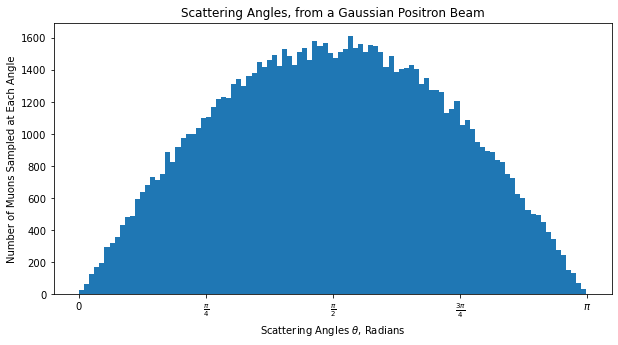

In [ ]:
def thetaGen3(howMany):#howMany - the number of thetas to generate #s - CoM energy squared
    E_lab_mean = 47571.03
    fwhm = 500 #MeV
    std = fwhm/(2*np.sqrt(2*np.log(2)))
    E_lab = npr.normal(loc = E_lab_mean, scale = std, size = howMany)
    s = 2*me2+2*m_e*E_lab
    theta = np.linspace(0,np.pi,100) #theta range used for inverse CDF calc
    thetas = [] #list to hold generated thetas
    for i in range(howMany):
        CDF = [cdf(x,s[i]) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
        thetaPredictor = interp1d(CDF, theta, kind = "linear")
        thetas.append(float(thetaPredictor(npr.uniform(min(CDF),max(CDF)))))
    return thetas

figThetaGen3 , ax = plt.subplots(figsize = (10,6))
generatedThetas = thetaGen3(int(10e4))
hist = plt.hist(generatedThetas, bins = 100)
y = hist[0]
binEdge = hist[1]
bincenters = 0.5 * (binEdge[1:]+binEdge[:-1])
binwidth = binEdge[1]-binEdge[0]
plt.title('Scattering Angles, from a Gaussian Positron Beam')
plt.ylabel('Number of Muons Sampled at Each Angle')
plt.xlabel(r'Scattering Angles $\theta$, Radians')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
plt.show()

### Boosting

Muon pair production will only occur if the center of mass energy has enough energy to account for two muons i.e it meets the condition that $\sqrt{s} \geq 2m_\mu $. 

![image.png](attachment:image.png)

<div>
    <center>
        <img src="attachment:image.png" width="80%" st>
    </center>
</div> 

---
 ### Center of mass frame

The centre of mass frame is defined such that the sum of the momentum must be zero. This is true for the incoming particles and therefore has to be true for the outgoing.

$$0=\sum_{i}{\vec{p}_{i}}$$

$$\vec{p}_{e^+}=-\vec{p}_{e^-}$$


$$p_{e^+}=\left(E_{e^+}, \vec{p}_{e^+}\right), \quad p_{e^-}=\left(E_{e^-}, \vec{p}_{e^-}\right), \quad $$
Adding these momentum in the matrix addition$s$ the opposite momentum cancel
$$s=\left(p_{e^+}+p_{e^-}\right)^{2}=\left(E_{e^+}+E_{e^-}, 0\right)^{2}=4 E^{2}$$


$$E=E_{e^+}=E_{e^-} \therefore \sqrt{s}=2 E$$

The energy available to the muon pair must be half of the center of mass energy. Note for convenicence  $m_\mu$ used here is the muon rest mass.  

$$E_\mu= \frac{s}{2} =\sqrt{p_\mu^{2} +m_{\mu}^{2}} \therefore |p_\mu| =\sqrt{\frac{s}{4} -m_\mu^2} $$ 


 ### Lab frame


Lab frame: is the frame that contains a particle at rest, in this experiment this is the stationary electron in the beryllium target. Note in this project system is defined such that the positron beam travels in  $z$.

$$p_{e^+}=\left(\begin{array}{c}
E  \\
0 \\
0 \\
p_z
\end{array}\right), \phantom{fillll}   p_{e^-}=\left(\begin{array}{c}
m_{e}
\\
0 \\
0 \\
0
\end{array}\right)$$

$$
p_{e^+} + p_{e^-}=\left(\begin{array}{c}
E+m_{e} \\
0\\
0 \\
p_z
\end{array}\right)$$

$$
s=(p_{e^+} + p_{e^-})^2= E^2 +2m_{e}E+ m_e^2 - p_z^2 $$

Remebering that  
 $$E^2 = p^2+m^2 \therefore p^2 = E^2-m^2$$
 Gives  
 $$s=2m_eE+2m_e^2 \approx 2m_eE$$


### Transforming between frames

We can obtain the Lorentz boost factor $\gamma$ by comparing the positron beam energy $E_{L A B}$ with the total centre of mass energy $\sqrt s$  through the following relation.

$$\gamma_{c m}=\left(E_{L A B}+m_{2}\right) / \sqrt{s}$$

In a simlar fashion  

$$v_{c m}=p_{L A B} /\left(E_{L A B}+m_{2}\right)$$

The center of mass frame is moving away from the lab frame in the $z$ axis with $v_z$ the change in $p_z$ can be calculated using standard momentum boost formulas as follows.

\begin{align} p'_z &= \gamma (p_z - E v/c^2) \end{align}
\begin{align} p_z &= \gamma (p_z' + E' v/c^2) \end{align}

The boosted energy can be derived from the relation $E^2 = p^2+m^2$ where in this formula $p$ is the 3 momentum  
<sub>**Diagrams and a useful sources for some of the mathematics 
https://web.physics.utah.edu/~jui/5110/hw/kin_rel.pdf}</sub>


In [ ]:
import numpy as np

#Natural Units Used for simplicity

m_mu = 105.6583755 #MeV
m_e = 0.510998 #MeV
E_additional = 50 #MeV 

root_s_min =  2*m_mu  
s_min = root_s_min**2

#Magnitudes from collision analysis canfound just from s and mass of the particle
def p_com(s, m):
    return np.sqrt((s-(2*m)**2)/4)
def p_lab(s, m):
    return (1/(2*m))*np.sqrt(s*(s-(2*m)**2))
def E_lab(s,m): #E 
    return (s - 2*m**2)/(2*m)  
def E_com(s,m):
    E_l=E_lab(s,m)
    return (m**2+m*E_l)/np.sqrt(s)  

#Boost formulas
def gamma_f_E(E_l, m,s):# gamma from energy, E_l is E_lab in function 
    return (E_l+m)/np.sqrt(s)
def beta_f_gamma(gamma):
    return 1 - 1/(gamma**2)
def boost_p(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(p-E*frame_v) 
def inv_boost_p(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(p+E*frame_v)
def boost_E(gamma, frame_v, E, p):#1D momentum boost
    return gamma*(E - frame_v*p) 
def inv_boost_E(gamma, frame_v, E, p):#This one is for everything from the other frame
    return gamma*(E+ frame_v*p)
def v_frame_com(p, E, m):
    return p/(E +m)

p_com_e = p_com(s_min,m_e)
p_com_mu = p_com(s_min,m_mu)
E_com_e = E_com(s_min,m_e)
E_com_mu = E_com(s_min,m_mu)

p_lab_e = p_lab(s_min,m_e)
p_lab_mu = p_lab(s_min,m_mu)
E_lab_e = E_lab(s_min,m_e) 
E_lab_mu = E_lab(s_min,m_mu)

print('root s', root_s_min)
print('Com ------------------')
print(' p_e =', p_com_e)
print(' E_e =',E_com_e)
print(' p_mu =', p_com_mu)
print(' E_mu =', E_com_mu)

print('Lab ------------------')
print(' p_e =', p_lab_e)
print(' E Positron /beam energy =', E_lab_e)
print(' p_mu =', p_lab_mu)
print(' E_mu =', E_lab_mu)

test = p_lab_e*m_e/root_s_min #expected result that p*=p_lab* m_2/(sqrt2) verified

print('Boosts ------------------')
v_com = v_frame_com(p_lab_e, E_lab_e, m_e)
print(' v com frame = ',v_com)

gamma = gamma_f_E(E_lab_e, m_e, s_min)
print(' gamma = ', gamma)
print('positron boost to com')
print(' p_lab_e', p_lab_e)
p_boost = boost_p(gamma,v_com, E_lab_e, p_lab_e)
print(' p_boost  = ', p_boost)
E_boost = boost_E(gamma, v_com, E_lab_e, p_lab_e)
print(' E_boost = ', E_boost)
print('boost back to lab')
p_back = inv_boost_p(gamma, v_com, E_com_e, p_com_e) #Test to see if we can get back to start
E_back = inv_boost_E(gamma, v_com, E_com_e, p_com_e)
print(' p_lab_back', p_back)
print(' E_lab_back', E_back)

root s 211.316751
Com ------------------
 p_e = 105.65713981716047
 E_e = 105.6583755
 p_mu = 0.0
 E_mu = 105.6583755
Lab ------------------
 p_e = 43693.17200089841
 E Positron /beam energy = 43693.17200388651
 p_mu = 0.0
 E_mu = 105.6583755
Boosts ------------------
 v com frame =  0.9999883049229777
 gamma =  206.7686673920446
positron boost to com
 p_lab_e 43693.17200089841
 p_boost  =  105.65713981569245
 E_boost =  105.65837549957115
boost back to lab
 p_lab_back 43693.17200089841
 E_lab_back 43693.17200388651


Here it was verified the boosts achieve known positron beam threshold energy of 43693 $MeV$ (43.7 $GeV$) in the lab frame of when $\sqrt{s} = 2 m_{\mu}$.    

### Muon generation

In the centre of mass frame, the momentum of the produced muon can be calculated from the norm of the momentum and the angles $\theta^*$ and $\phi^*$. Since that there is no preferred direction of  $\phi^*$ in this monte carlo simulation $\phi^*$ is pulled from a uniform random distribution between $0$ and $2\pi$ for each muon pair. The angle of $\theta*$ is taken from the previously calculated distribution.


$$
p^{*}=\left(\begin{array}{c}
E / c \\
p_{x} \\
p_{y} \\
p_{z}
\end{array}\right)=\left(\begin{array}{c}
\sqrt{S} / 2 \\
p_{\mu} \sin \theta^{*} \sin \phi^{*} \\
p_{\mu} \sin \theta^{*} \cos \phi^{*} \\
p_{\mu} \cos \theta^{*}
\end{array}\right)
$$

where $p_{\mu}=\sqrt{S / 4-m_{\mu}^{2}}$.

The produced muon coordinates are then boosted to the labratory.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.interpolate import interp1d
import numpy.random as npr
import pandas as pd

def thetaGen3_j(howMany,dummy_v):# same but has dummy varible for my loop 
    E_lab_mean = 47571.03
    fwhm = 500 #MeV
    std = fwhm/(2*np.sqrt(2*np.log(2)))
    E_lab = npr.normal(loc = E_lab_mean, scale = std, size = howMany)
    s = 2*me2+2*m_e*E_lab
    theta = np.linspace(0,np.pi,100) #theta range used for inverse CDF calc
    thetas = [] #list to hold generated thetas
    for i in range(howMany):
        CDF = [cdf(x,s[i]) for x in theta]
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
        thetaPredictor = interp1d(CDF, theta, kind = "linear")
        thetas.append(float(thetaPredictor(npr.uniform(min(CDF),max(CDF)))))
    return thetas


def p_muon_com(theta, phi,s): # initalise the input muon 
    E_muon = E_lab(s, m_mu)#even energy split
    p_mag = np.sqrt(s/4 - m_mu**2)
    #print(p_mag)
    p_x = p_mag * np.sin(theta)*np.sin(phi) 
    p_y =  p_mag * np.sin(theta)*np.cos(phi)
    p_z =  p_mag * np.cos(theta)
    
    return p_x, p_y, p_z 

    
def p_mag_(mu):
    return np.sqrt(mu[1]**2+mu[2]**2+mu[3]**2)

def momenta_data(mu_d1, mu_d2):
    return mu_d1[0], mu_d1[1],mu_d1[2], mu_d2[0], mu_d2[1],mu_d2[2]



root_s =  2*m_mu  
s = root_s**2 + 20000

def mc(s,N, theta_funct):
 
    theta=np.array(theta_funct(N,s))
    phi = np.random.uniform(size = N, low = 0, high = 2*np.pi)
    gamma = gamma_f_E(E_lab_e, m_e, s)
    
    v_com = v_frame_com(p_lab_e, E_lab_e, m_e)
    muon_cm  = np.array(p_muon_com(theta, phi, s))    
    muon_cm2  = np.array(p_muon_com(theta-np.pi,phi, s))

    #z change 
    z_b1= inv_boost_p(gamma, v_com, (s**0.5)/2, muon_cm[2])
    z_b2= inv_boost_p(gamma, v_com, (s**0.5)/2, muon_cm2[2])
    muon_lab = [muon_cm[0], muon_cm[1], z_b1]
    muon_lab2 = [muon_cm2[0], muon_cm2[1], z_b2]
    
    momenta_com = np.array(momenta_data(muon_cm, muon_cm2)).T
    momenta_lab = np.array(momenta_data(muon_lab, muon_lab2)).T
    
    df_com = pd.DataFrame(momenta_com, columns = ['$p^{\mu}_{1x}$', '$p^{\mu}_{1y}$','$p^{\mu}_{1z}$','$p^{\mu}_{2x}$', '$p^{\mu}_{2y}$','$p^{\mu}_{2z}$'])
    df_lab = pd.DataFrame(momenta_lab, columns = ['$p^{\mu}_{1x}$', '$p^{\mu}_{1y}$','$p^{\mu}_{1z}$','$p^{\mu}_{2x}$', '$p^{\mu}_{2y}$','$p^{\mu}_{2z}$'])

    return  df_com, df_lab
    
Num =100000

#df_cm, df_lb =  mc(s, Num, thetaGen3_j) #Gaussain Positron Beam just takes a long time so placed here
#df_cm2, df_lb2 =mc(s,Num, thetaGen2) #Full theta gen 2 MC
#saves time
df_cm =pd.read_csv("theta_g_3_cm.csv")
df_lb =pd.read_csv("theta_g_3_lab.csv")
df_cm2=pd.read_csv("theta_g_3_cm2.csv")
df_lb2=pd.read_csv("theta_g_3_lab2.csv")
df_lb

,$p^{\mu}_{1x}$,$p^{\mu}_{1y}$,$p^{\mu}_{1z}$,$p^{\mu}_{2x}$,$p^{\mu}_{2y}$,$p^{\mu}_{2z}$
0,43.506904,43.952917,27737.612300,-43.506904,-43.952917,15955.559701
1,-55.732477,-16.922898,28736.197624,55.732477,16.922898,14956.974377
2,-57.383563,8.241940,14889.394474,57.383563,-8.241940,28803.777527
3,17.777502,23.100190,10776.262961,-17.777502,-23.100190,32916.909040
4,46.124682,-51.204758,24566.763017,-46.124682,51.204758,19126.408984
...,...,...,...,...,...,...
99995,-14.130863,69.284313,21855.451498,14.130863,-69.284313,21837.720503
99996,-11.651414,51.747794,29881.555092,11.651414,-51.747794,13811.616909
99997,39.225196,-34.721768,30008.030183,-39.225196,34.721768,13685.141818
99998,-7.633688,41.528521,31593.143325,7.633688,-41.528521,12100.028675


Plotting the count numbers of the histogram  

Text(0.5, 1.0, 'Guassian beam $\\mu_1$ $P_z$  lab frame ($N=100000)$')

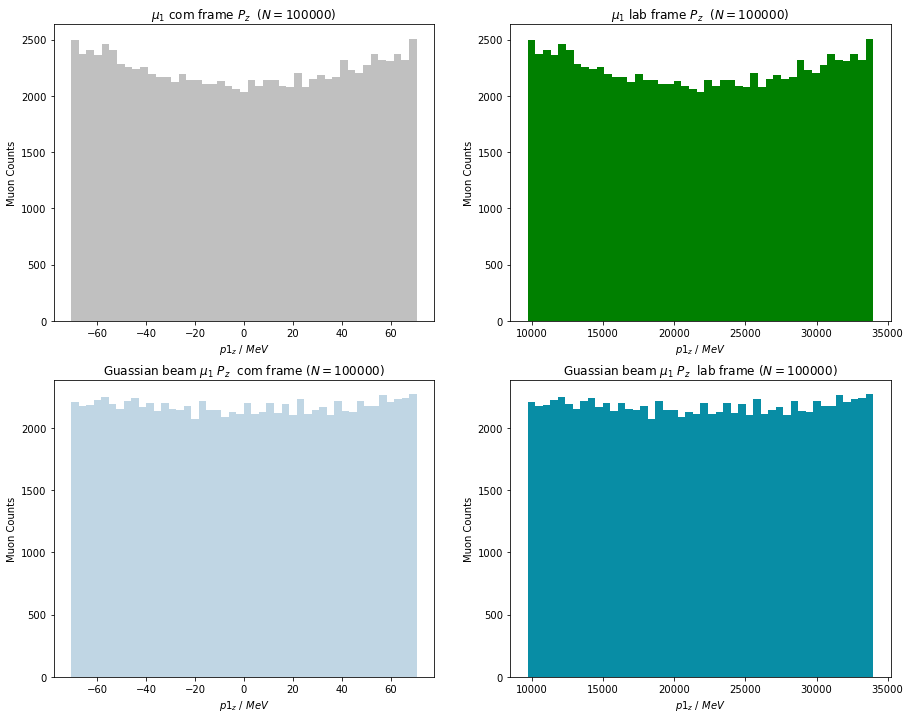

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))


ax[0,0].hist(df_cm2['$p^{\mu}_{1z}$'], bins='auto',color ='#c0c0c0')
ax[0,0].set_xlabel("$p1_z$ / $MeV$")
ax[0,0].set_ylabel("Muon Counts")
ax[0,0].set_title('$\mu_1$ com frame $P_z$  ($N='+str(Num)+')$')

#leaving the slow data frame on the last section to reduce loading]
ax[0,1].hist(df_lb2['$p^{\mu}_{1z}$'], bins='auto', color ='green')
ax[0,1].set_xlabel("$p1_z$ / $MeV$")
ax[0,1].set_ylabel("Muon Counts")
ax[0,1].set_title('$\mu_1$ lab frame $P_z$  ($N='+str(Num)+')$')



ax[1,0].hist(df_cm['$p^{\mu}_{1z}$'], bins='auto', color ='#c0d6e4')
ax[1,0].set_xlabel("$p1_z$ / $MeV$")
ax[1,0].set_ylabel("Muon Counts")
ax[1,0].set_title('Guassian beam $\mu_1$ $P_z$  com frame ($N='+str(Num)+')$')

#leaving the slow data frame on the last section to reduce loading
ax[1,1].hist(df_lb['$p^{\mu}_{1z}$'], bins='auto', color='#088da5')
ax[1,1].set_xlabel("$p1_z$ / $MeV$")
ax[1,1].set_ylabel("Muon Counts")
ax[1,1].set_title('Guassian beam $\mu_1$ $P_z$  lab frame ($N='+str(Num)+')$')

These plots show a comparison of both the momentum distributions in the center of mass and the lab frames. As well as the simple beam case, these graphs are also calculated for the simulated gauassian positron beam.

In [ ]:
df_cm.to_csv("theta_g_3_cm.csv", index=False)
df_lb.to_csv("theta_g_3_lab.csv", index=False)
df_cm2.to_csv("theta_g_3_cm2.csv", index=False)
df_lb2.to_csv("theta_g_3_lab2.csv", index=False)



## Rescaling Factor

Given $N$ generated events, we can calculate the correct statistics for an experiment lasting one week just by applying to the simulated events a rescaling factor ($C$). The target is a 3cm thick Beryllium block and it is bombarded by a positrons arriving at a rate of $10^6$ Hz.

The number of $(\mu^+ \mu^-)$ pairs produced per positron bunch on target is:

$$n(\mu^+ \mu^-)=n^+ \rho_{e^-} l_{Be}\, \sigma(\mu^+ \mu^-).$$

where $n^+$  is the number of positrons in the bunch, $\rho_{e^-}$ is the electron density in the medium, $l_{Be}$ is the thickness of the target, $\sigma(\mu^+ \mu^-)$ is the muon pairs production cross-section, as we have shown before it depends on the scattering angle $\theta$ and with center of mass energy $\sqrt s$ as a parameter.
The electron density in the medium can be computed as:

$$ \rho_{e^-} = N_A \frac{\rho_{\mathrm{Be}}}{M} Z $$

with $N_A$ being Avogadro constant, $\rho_{\mathrm{Be}}$ is the target density (Beryllium), $Z$ is its atomic number, $M$ is its molar mass.

We can rewrite the first formula as a function of the rate of positrons on the target $\lambda_{e^+}$, thus we get:

$$f(\mu^+ \mu^-)=\lambda_{e^+} \rho_{e^-} l_{Be}\, \sigma(\mu^+ \mu^-).$$

Then the rescaling factor is given by:

$$C=\frac{f(\mu^+ \mu^-) \Delta T}{N}.$$



The center of mass energy $\sqrt{s}$ can be found using the beam energy in the lab frame $E_{LAB}$ and the mass of the beam and target particles, which are both $m_e$ in this case. The following equation shows the relation [2].

$$s = 2m_e^2+2m_e~E_{LAB}$$ 

The $E_{LAB}$ used is the minimum beam energy energy calculated in section 8 when considering the thickness of the target.

$$E_{LAB} = 47571.03~MeV$$

In [ ]:
lBe = 3                  #Beryllium target thickness [cm]
lmbd = 1e+6              #rate of positron on target [Hz]
time = 60*60*24*7        #seconds in a week [s]
Na = 6.0221409e+23       #Avogadro constant [mol^-1]
dBe = 1.85               #Beryllium density [g/cm^3]
ZBe = 4                  #Beryllium atomic number
MBe = 9.0121820          #Berylium molar mass [g/mol]
Elab = 47571.03165490111 #[MeV]


s_nominal = 2*me**2+2*me*Elab #calculated from beam energy required to penetrate 3cm
print('The s value is equal to', s, "MeV")

d_el = Na * dBe * ZBe / MBe     #Beryllium electron density [number of electron/cm^-3]

#1barn=1e-24 cm^2 #1MeV^-2=389.379barn
sig_nominal = sigma(s_nominal) * (1e-24) * 389379 #muons pair production cross section [cm^2]
print('Total cross section',sig_nominal, ' cm^2')

f_mu = lmbd * d_el * lBe * sig_nominal  #rate of produced muon pairs [Hz]
C = f_mu * time                         #scaling factor

print("Muon pairs produced in a week:", int(C), "  or  6.7e8")

# apply the scale factor to the N events in order to
# represent the statistics that would be gathered in a
# week of continuous operations

N=1e+5
weight = C/N  #weight factor

#WARNING
#apply the weight to Jake datatframe then make a histplot of what jake did, different results obtained obviously




The s value is equal to 68286.44435319601 MeV
Total cross section 7.443107930389676e-28  cm^2
Muon pairs produced in a week: 667790186   or  6.7e8


We have already chosen the positron energy so that the reaction occurs close to the threshold (assuming the electrons in the Beryllium target at rest) which means the center of mass energy $\sqrt {s}$ should be
$$\sqrt {s} \sim 2m_\mu ,$$ 
in order to have the muon pairs production along the entire length of the target.
We chose so at the beginning to minimize the divergence of the resulting "muon beam".

Addition of four momenta in case of particles with relativistic momenta:
$$p_{e^+}=\begin{pmatrix} E_{e_+} \\ p_{x} \\ 0 \\ 0 \end{pmatrix}, \ \ \ \  p_{e^-}=\begin{pmatrix} E_{e_-} \\ 0 \\ 0 \\ 0 \end{pmatrix}$$

It is possible to compute the Mandelstam variable $s$ with the target electron at rest (no momentum) in the laboratory frame:
$$ s=(p_{e^+} + p_{e^-})^2 =$$ $$E_{e_+}^2 + E_{e_-}^2+2E_{e_+}E_{e_-}-\vec p_{e_+}^2 =$$ $$ E_{e_+}^2 + m_{e}^2+2E_{e_+}m_{e}-\vec p_{e_+}^2,$$ 
remembering that $E^2=p^2+m^2$, then the previous is equal to:
$$\vec p_{e_+}^2+m_{e}^2+m_{e}^2+2E_{e_+}m_{e}-\vec p_{e_+}^2 = 2E_{e_+}m_{e}+2m_{e}$$
With respect to the initial condition:
$$2E_{e_+}m_{e}+2m_{e}>4m_\mu^2.$$
So the positron energy has to be:
$$E_{e_+}>\frac{4m_{\mu}^2-2m_{e}^2}{2m_{e}}.$$
Now we can compute the energy lost traversing the target, if we assume $z$ is the longitudianl coordinate parallel to the beam direction, with $X_{0}$ as the Beryllium radiation length, $35.28cm$ [5]:
$$E(z)=E_{0}e^{-\frac{z}{X_{0}}}.$$

If the target length considered is $l=3 cm$ (as in point 6) then the nominal beam energy $E_0$ has to be:
$$E_0>E_{e_+}e^{\frac{l}{X_{0}}}.$$


Threshold energy condition(MeV): 43693.17200388651
Nominal beam energy required for the treshold reaction to happen(MeV): 47571.12009661152


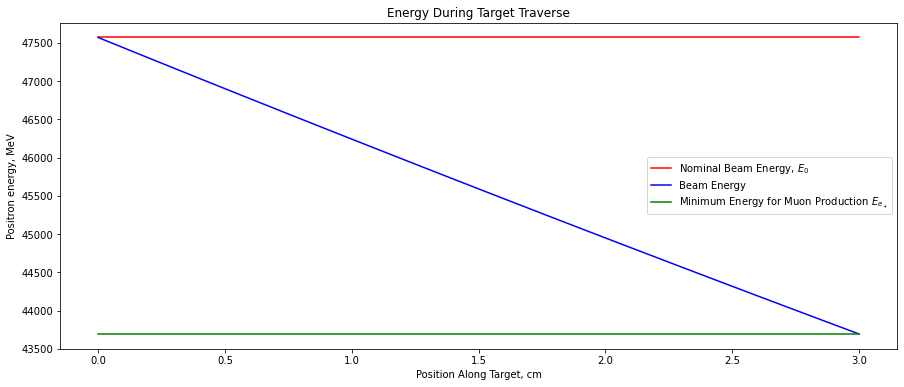

In [ ]:
rad_length = 35.28   #radiation length of Beryllium [cm]
l = [3,100]          #Beryllium target thickness [cm]

E_p = ((4*m_muon**2 - 2*m_e**2)/(2*m_e))
print("Threshold energy condition(MeV):",E_p)
E_0 = E_p*np.exp(l[0]/rad_length) #minimum
print("Nominal beam energy required for the treshold reaction to happen(MeV):",E_0)

def E_z(x,E0):
    return E0*np.exp(-x/rad_length)
  
x = np.linspace(0, l[0])

E_z = [E_z(xi,E_0) for xi in x]
E_par = [E_p for xi in x]
E_0ar = [E_0 for xi in x]

fig = plt.figure(figsize=(15,6))
plt.plot(x,E_0ar, label = r"Nominal Beam Energy, $E_0$", color = 'red')
plt.plot(x,E_z,label="Beam Energy",color='blue')
plt.plot(x,E_par,label = r"Minimum Energy for Muon Production $E_{e_+}$" ,color = 'green')
plt.title("Energy During Target Traverse")
plt.xlabel("Position Along Target, cm")
plt.ylabel("Positron energy, MeV")
plt.legend()
plt.show()


We can take into account the energy loss along the target lenght of the former point, which means that the muons pair-production probability varies with the cross section along the target.

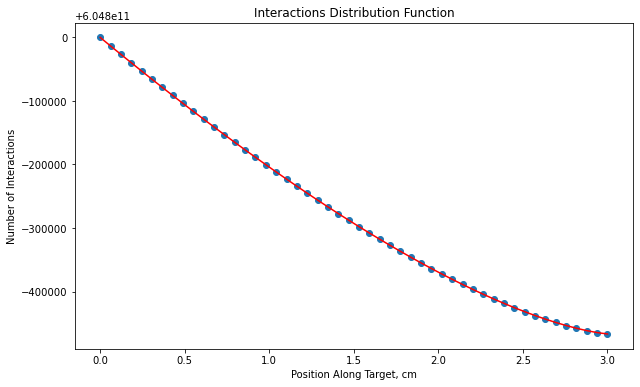

In [ ]:
#compute s as a function of the longitudinal coordinate of the target material
s0 = 2*me*E_0+2*(me**2)
def s(z):
    return s0 * np.exp(-z/rad_length)


#compute the value of the cross section sigma
def sig(z):
    return sigma(s(z))


#compute how many interactions are likely to happen if we divide the target in finite layers 
n_steps = 50 #number of layers
scale = l[0]/n_steps *1e-24* 389.379*d_el #conversion from Mev to cm^2
steps = np.linspace(0,l[0],n_steps) #width of the steps
interactions = np.zeros(n_steps) #array of particles per layer
n_positron = lmbd*time
interactions[0] = n_positron

for i in range(n_steps-1):
    interactions[i+1] = interactions[i]*(1-(scale * sig(steps[i]) ))


#obtain the normalised distribution for the interactions 
norm_f = interp1d(steps, interactions, bounds_error=False)
numInter = norm_f(steps)
figIDF = plt.figure(figsize = (10,6))
plt.scatter(steps, interactions)
plt.plot(steps, numInter, color='red')
plt.title('Interactions Distribution Function')
plt.xlabel('Position Along Target, cm')
plt.ylabel('Number of Interactions')
'''
ylables = (numInter[0],numInter[int(len(numInter)/5)],numInter[int(len(numInter)*2/5)],numInter[int(len(numInter)*3/5)],numInter[int(len(numInter)*4/5)], numInter[int(len(numInter))])
ylocations = [numInter[0],numInter[int(len(numInter)/5)],numInter[int(len(numInter)*2/5)],3*np.pi/4,np.pi,numInter[int(len(numInter)*3/5)],numInter[int(len(numInter)*4/5)],numInter[int(len(numInter))]]
plt.yticks(ticks = ylocations, labels = ylables)
'''
plt.show()

In [ ]:
me = 0.510998

#Theta Generation, Sampling from the PDF, Using Inverse CDF Method, Considering gaussian beam shape
#FWHM 500 MeV
#Allows any energy to be inserted so that it can be used to make multiple distributions.
def thetaGen4(howMany,E_mean):             #howMany: number of thetas to generate 
    fwhm = 500 #[MeV]
    std = fwhm/(2*np.sqrt(2*np.log(2)))
    E_lab = npr.normal(loc = E_mean, scale = std, size = howMany)
    si = 2*(me**2)+2*me*E_lab
    THETA = np.linspace(0,np.pi,100)        #theta range used for inverse CDF calc
    THETAS = []                             #list to hold generated thetas
    for i in range(howMany):
        
        CDF = [cdf(th,si[i]) for th in THETA]
        CDFmin = min(CDF)
        CDFmax = max(CDF)
        if np.isnan(CDFmin) or np.isnan(CDFmax): 
            CDFmin = 0.01
            CDFmax = 0.99
    #thetaPredictor is the inverse CDF brought about using a look up table (theta,CDF) and interpolation
        thetaPredictor = interp1d(CDF, theta, kind = "linear")
        THETAS.append(float(thetaPredictor(npr.uniform(CDFmin,CDFmax))))
    
    
    return THETAS

rad_length = 35.28   #radiation length of Beryllium [cm]
E_0 = 47572
def E_z(x,E0):
    return E0*np.exp(-x/rad_length)

howManyTotal = 10e5
n_steps = 50
x_steps = np.linspace(0,3,n_steps)
Ez = [E_z(x,E_0) for x in x_steps]

thetasGenerated = []
for i in range(n_steps):
    thetasInStep = thetaGen4(int(howManyTotal/n_steps),Ez[i])    #change 100 to the number of thetas you want to generate in each step
    thetasGenerated = [*thetasGenerated, *thetasInStep] #the final one should be e5/number of steps

fig_res = plt.figure()
hist = plt.hist(thetasGenerated, bins = 100)
y = hist[0]
binEdge = hist[1]
bincenters = 0.5 * (binEdge[1:]+binEdge[:-1])
binwidth = binEdge[1]-binEdge[0]
plt.title('Scattering Angles - Gaussian Positron Beam - Exponential Decrease in Beam Energy')
plt.ylabel('Muons Sampled at Each Angle')
plt.xlabel(r'Scattering Angles \theta')
xlables = ['0',r'$\frac{\pi}{4}$',r'$\frac{\pi}{2}$',r'$\frac{3\pi}{4}$',r'$\pi$']
xlocations = [0,np.pi/4,np.pi/2,3*np.pi/4,np.pi]
plt.xticks(ticks = xlocations, labels = xlables)
plt.show()

### References:

[1] Electron-positron anhilation into muon-antimuon pairs http://www.physics.usu.edu/Wheeler/QFT/PicsII/QFT10Feb23Muon.pdf

[2] Relativistic Kinematics of Particle Interactions
byWvon Schlippe, March 2002 
https://web.physics.utah.edu/~jui/5110/hw/kin_rel.pdf

[3] Production of the Smallest QED Atom: True Muonium $(\mu^+ \mu^-)$ 
https://arxiv.org/abs/0904.2225

[4] Muon production and accumulation from positrons on target https://journals.aps.org/prab/pdf/10.1103/PhysRevAccelBeams.23.051001 ,

[5] Beryllium radiation length 
https://pdg.lbl.gov/2021/AtomicNuclearProperties/HTML/beryllium_Be.html
